In [153]:
# Importing libraries needed for data cleaning and EDA
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import re
import datetime

from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from sklearn.feature_extraction.text import CountVectorizer

In [2]:
# call in dataset
pmaw_df = pd.read_csv('./datasets/pmaw_df')

/var/folders/qj/y1s515qj7mb9vkm1psszq6d00000gn/T/ipykernel_23845/3318565204.py:2: DtypeWarning: Columns (20,87,93,123) have mixed types. Specify dtype option on import or set low_memory=False.
  pmaw_df = pd.read_csv('./datasets/pmaw_df')


The next step is to figure out what to do with this large amount of data. First the data should be cleaned and free of null values and duplicates as well as removing any non-alphanumerical characters that won't help us in the classification model.

# Initial Analysis

In [3]:
pmaw_df.describe()

,Unnamed: 0,comment_limit,approved_at_utc,mod_reason_title,gilded,pwls,downs,thumbnail_height,upvote_ratio,ups,...,num_reports,mod_reason_by,report_reasons,num_comments,subreddit_subscribers,created_utc,num_crossposts,call_to_action,event_start,event_end
count,10000.00000,10000.0,0.0,0.0,10000.00000,10000.0,10000.0,3747.000000,10000.000000,10000.000000,...,0.0,0.0,0.0,10000.000000,1.000000e+04,1.000000e+04,10000.000000,0.0,1.000000e+00,1.000000e+00
mean,4999.50000,2048.0,NaN,NaN,0.00590,6.0,0.0,97.651188,0.809797,252.545800,...,NaN,NaN,NaN,57.174100,5.163245e+06,1.614467e+09,0.053000,NaN,1.590361e+09,1.590376e+09
std,2886.89568,0.0,NaN,NaN,0.10033,0.0,0.0,34.128268,0.241935,1230.992996,...,NaN,NaN,NaN,484.555503,2.642096e-01,2.556958e+07,0.622278,NaN,NaN,NaN
min,0.00000,2048.0,NaN,NaN,0.00000,6.0,0.0,0.000000,0.040000,0.000000,...,NaN,NaN,NaN,0.000000,5.163245e+06,1.579903e+09,0.000000,NaN,1.590361e+09,1.590376e+09
25%,2499.75000,2048.0,NaN,NaN,0.00000,6.0,0.0,78.000000,0.670000,1.000000,...,NaN,NaN,NaN,1.000000,5.163245e+06,1.592482e+09,0.000000,NaN,1.590361e+09,1.590376e+09
50%,4999.50000,2048.0,NaN,NaN,0.00000,6.0,0.0,105.000000,0.930000,1.000000,...,NaN,NaN,NaN,9.000000,5.163245e+06,1.607309e+09,0.000000,NaN,1.590361e+09,1.590376e+09
75%,7499.25000,2048.0,NaN,NaN,0.00000,6.0,0.0,140.000000,1.000000,30.000000,...,NaN,NaN,NaN,40.000000,5.163245e+06,1.636766e+09,0.000000,NaN,1.590361e+09,1.590376e+09
max,9999.00000,2048.0,NaN,NaN,4.00000,6.0,0.0,140.000000,1.000000,35186.000000,...,NaN,NaN,NaN,40688.000000,5.163246e+06,1.662032e+09,54.000000,NaN,1.590361e+09,1.590376e+09


In [4]:
# drop 'Unnamed: 0 column'
pmaw_df.drop(columns = 'Unnamed: 0', inplace = True)

In [5]:
# 10_000 submissions with 123 columns -- need to clean up!
pmaw_df.shape

(10000, 123)

In [6]:
list(pmaw_df.columns)

['comment_limit',
 'comment_sort',
 '_reddit',
 'approved_at_utc',
 'subreddit',
 'selftext',
 'author_fullname',
 'saved',
 'mod_reason_title',
 'gilded',
 'clicked',
 'title',
 'link_flair_richtext',
 'subreddit_name_prefixed',
 'hidden',
 'pwls',
 'link_flair_css_class',
 'downs',
 'thumbnail_height',
 'top_awarded_type',
 'hide_score',
 'name',
 'quarantine',
 'link_flair_text_color',
 'upvote_ratio',
 'author_flair_background_color',
 'subreddit_type',
 'ups',
 'total_awards_received',
 'media_embed',
 'thumbnail_width',
 'author_flair_template_id',
 'is_original_content',
 'user_reports',
 'secure_media',
 'is_reddit_media_domain',
 'is_meta',
 'category',
 'secure_media_embed',
 'link_flair_text',
 'can_mod_post',
 'score',
 'approved_by',
 'is_created_from_ads_ui',
 'author_premium',
 'thumbnail',
 'edited',
 'author_flair_css_class',
 'author_flair_richtext',
 'gildings',
 'content_categories',
 'is_self',
 'mod_note',
 'created',
 'link_flair_type',
 'wls',
 'removed_by_categ

In [7]:
# drop columns that have more than 50% NaN values
pmaw_df.dropna(thresh=len(pmaw_df) / 2, axis = 1)

,comment_limit,comment_sort,_reddit,subreddit,selftext,author_fullname,saved,gilded,clicked,title,...,permalink,parent_whitelist_status,stickied,url,subreddit_subscribers,created_utc,num_crossposts,is_video,_fetched,_comments_by_id
0,2048,confidence,<praw.reddit.Reddit object at 0x7fa8e1c78a90>,nba,"90s Bulls\n\n- Kevin Johnson, MJ, Pippen, Rodm...",t2_6hryekch,False,0,False,90s Bulls with Prime Mutombo and Rodman vs 90s...,...,/r/nba/comments/hqqgua/90s_bulls_with_prime_mu...,all_ads,False,https://www.reddit.com/r/nba/comments/hqqgua/9...,5163245,1.594683e+09,0,False,False,{}
1,2048,confidence,<praw.reddit.Reddit object at 0x7fa8e1c78a90>,nba,[deleted],NaN,False,0,False,Lebron vs MJ Great Article,...,/r/nba/comments/hqqgbb/lebron_vs_mj_great_arti...,all_ads,False,NaN,5163245,1.594683e+09,0,False,False,{}
2,2048,confidence,<praw.reddit.Reddit object at 0x7fa8e1c78a90>,nba,It’s common to just assume the Bucks will take...,t2_4161v0k0,False,0,False,Are we underrating the Eastern Conference play...,...,/r/nba/comments/hqqfpg/are_we_underrating_the_...,all_ads,False,https://www.reddit.com/r/nba/comments/hqqfpg/a...,5163245,1.594683e+09,0,False,False,{}
3,2048,confidence,<praw.reddit.Reddit object at 0x7fa8e1c78a90>,nba,[deleted],NaN,False,0,False,Who is da GOAT,...,/r/nba/comments/hqqerl/who_is_da_goat/,all_ads,False,NaN,5163245,1.594683e+09,0,False,False,{}
4,2048,confidence,<praw.reddit.Reddit object at 0x7fa8e1c78a90>,nba,[deleted],NaN,False,0,False,"Kawhi at practice in Orlando, Today!",...,/r/nba/comments/hqqej2/kawhi_at_practice_in_or...,all_ads,False,NaN,5163245,1.594683e+09,0,False,False,{}
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,2048,confidence,<praw.reddit.Reddit object at 0x7fa8e1c78a90>,nba,[removed],t2_btpf2,False,0,False,"On average from highest to lowest, what is the...",...,/r/nba/comments/jsmf9e/on_average_from_highest...,all_ads,False,https://www.reddit.com/r/nba/comments/jsmf9e/o...,5163246,1.605149e+09,0,False,False,{}
9996,2048,confidence,<praw.reddit.Reddit object at 0x7fa8e1c78a90>,nba,[removed],NaN,False,0,False,I’m so tired of the Jamal Murray memes,...,/r/nba/comments/jsme1n/im_so_tired_of_the_jama...,all_ads,False,NaN,5163246,1.605148e+09,0,False,False,{}
9997,2048,confidence,<praw.reddit.Reddit object at 0x7fa8e1c78a90>,nba,[deleted],NaN,False,0,False,Should the Los Angeles Lakers trade for Spence...,...,/r/nba/comments/jsmcxc/should_the_los_angeles_...,all_ads,False,NaN,5163246,1.605148e+09,0,False,False,{}
9998,2048,confidence,<praw.reddit.Reddit object at 0x7fa8e1c78a90>,nba,NaN,t2_7ex96k12,False,0,False,"Mark Daigneault, new Oklahoma Thunder’s head c...",...,/r/nba/comments/jsmcf3/mark_daigneault_new_okl...,all_ads,False,https://deepersport.com/mark-daigneault-new-ok...,5163246,1.605148e+09,0,False,False,{}


We will sift through all the columns and remove those that have irrelevent information or does not have value within our model. It seems like there are multiple columns that have the same value for all of the submissions therefore those will be removed as well.

In [8]:
pmaw_df['comment_limit'].value_counts()

2048    10000
Name: comment_limit, dtype: int64

In [9]:
pmaw_df['comment_sort'].value_counts()

confidence    10000
Name: comment_sort, dtype: int64

In [10]:
pmaw_df['_reddit'].value_counts()

<praw.reddit.Reddit object at 0x7fa8e1c78a90>    10000
Name: _reddit, dtype: int64

In [11]:
pmaw_df['approved_at_utc'].value_counts()

Series([], Name: approved_at_utc, dtype: int64)

In [12]:
pmaw_df['saved'].value_counts()

False    10000
Name: saved, dtype: int64

In [13]:
pmaw_df['mod_reason_title'].value_counts()

Series([], Name: mod_reason_title, dtype: int64)

In [14]:
pmaw_df['clicked'].value_counts()

False    10000
Name: clicked, dtype: int64

In [15]:
pmaw_df['link_flair_richtext'].value_counts()

[]                                                                                         8769
[{'e': 'text', 't': 'Highlight'}]                                                           427
[{'e': 'text', 't': 'News'}]                                                                184
[{'e': 'text', 't': 'Highlights'}]                                                          171
[{'e': 'text', 't': 'Post Game Thread'}]                                                    117
[{'e': 'text', 't': 'Game Thread'}]                                                          68
[{'e': 'text', 't': 'Original Content'}]                                                     44
[{'e': 'text', 't': 'National Writer'}]                                                      41
[{'e': 'text', 't': 'Beat Writer'}]                                                          36
[{'e': 'text', 't': 'Spoilers'}]                                                             24
[{'e': 'text', 't': 'Stats'}]           

In [16]:
pmaw_df['subreddit_name_prefixed'].value_counts()

r/nba    10000
Name: subreddit_name_prefixed, dtype: int64

In [17]:
pmaw_df['hidden'].value_counts()

False    10000
Name: hidden, dtype: int64

In [18]:
pmaw_df['pwls'].value_counts()

6    10000
Name: pwls, dtype: int64

In [19]:
pmaw_df['downs'].value_counts()

0    10000
Name: downs, dtype: int64

In [20]:
pmaw_df['thumbnail_height'].value_counts()

78.0     1052
140.0     966
105.0     918
0.0       198
73.0      137
         ... 
85.0        1
49.0        1
126.0       1
56.0        1
10.0        1
Name: thumbnail_height, Length: 79, dtype: int64

In [21]:
pmaw_df['top_awarded_type'].value_counts()

INACTIVE    1
Name: top_awarded_type, dtype: int64

In [22]:
pmaw_df['hide_score'].value_counts()

False    10000
Name: hide_score, dtype: int64

In [23]:
pmaw_df['name'].value_counts()

t3_hqqgua    1
t3_rsnc4v    1
t3_rsnmf5    1
t3_rsnkf6    1
t3_rsnjk2    1
            ..
t3_ijutga    1
t3_ijupgo    1
t3_ijunm7    1
t3_ijui6z    1
t3_jsmccu    1
Name: name, Length: 10000, dtype: int64

In [24]:
pmaw_df['quarantine'].value_counts()

False    10000
Name: quarantine, dtype: int64

In [25]:
pmaw_df['link_flair_text_color'].value_counts()

dark     9185
light     812
Name: link_flair_text_color, dtype: int64

In [26]:
pmaw_df['ups'].value_counts()

1       3421
0       1667
2        370
3        216
4        170
        ... 
425        1
650        1
9065       1
2821       1
1448       1
Name: ups, Length: 1160, dtype: int64

In [27]:
pmaw_df['author_flair_background_color'].value_counts()

#edeff1    2917
#d3d6da      19
#dadada       4
Name: author_flair_background_color, dtype: int64

In [28]:
# we're gonna keep this column
pmaw_df['total_awards_received'].value_counts()

0     9451
1      267
2      104
3       43
5       22
4       18
8       18
6       16
7       10
10       8
9        4
11       4
12       4
19       4
25       3
14       3
38       3
17       2
15       2
16       2
13       2
22       2
23       1
51       1
35       1
63       1
95       1
49       1
24       1
18       1
Name: total_awards_received, dtype: int64

In [29]:
pmaw_df['media_embed'].value_counts()

{}                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                          7573
{'content': '<blockquot

In [30]:
pmaw_df['author_flair_template_id'].value_counts()

e5aa3fb6-3feb-11e8-8409-0ef728aaae7a    215
cc0d49ae-3feb-11e8-8327-0e3e867879aa    108
cc57a3a0-3feb-11e8-a765-0ee0c6cba6de    101
c62b0378-3feb-11e8-882d-0ebe5c653b82     82
db0be97e-3feb-11e8-aeab-0ee637d2d8dc     81
                                       ... 
71d9b198-b670-11e7-a125-0ea7dbaab890      1
47d8eb1c-362b-11e8-a23f-0e560f6fb3e6      1
4d482edc-362b-11e8-b457-0eb38f8bad7e      1
79dcad3c-b670-11e7-b70b-0e7f0a0db672      1
71b45de4-b670-11e7-871e-0e4dac27fbf2      1
Name: author_flair_template_id, Length: 233, dtype: int64

In [31]:
pmaw_df['is_original_content'].value_counts()

False    10000
Name: is_original_content, dtype: int64

In [32]:
pmaw_df['secure_media'].value_counts()

{'type': 'twitter.com', 'oembed': {'provider_url': 'https://twitter.com', 'version': '1.0', 'url': 'https://twitter.com/JoelEmbiid/status/1529654566383403008', 'author_name': 'Joel “Troel” Embiid', 'height': None, 'width': 350, 'html': '<blockquote class="twitter-video"><p lang="en" dir="ltr">Miami needs another Star</p>&mdash; Joel “Troel” Embiid (@JoelEmbiid) <a href="https://twitter.com/JoelEmbiid/status/1529654566383403008?ref_src=twsrc%5Etfw">May 26, 2022</a></blockquote>\n<script async src="https://platform.twitter.com/widgets.js" charset="utf-8"></script>\n', 'author_url': 'https://twitter.com/JoelEmbiid', 'provider_name': 'Twitter', 'cache_age': 3153600000, 'type': 'rich'}}                                                                                                                                                                                                                                                                                                                      

In [33]:
pmaw_df['is_reddit_media_domain'].value_counts()

False    9708
True      292
Name: is_reddit_media_domain, dtype: int64

In [34]:
pmaw_df['is_meta'].value_counts()

False    10000
Name: is_meta, dtype: int64

In [35]:
pmaw_df['category'].value_counts()

Series([], Name: category, dtype: int64)

In [36]:
pmaw_df['secure_media_embed'].value_counts()

{}                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                      

In [37]:
pmaw_df['link_flair_text'].value_counts()

Highlight                                                          427
News                                                               184
Highlights                                                         171
Post Game Thread                                                   117
Game Thread                                                         68
Original Content                                                    44
National Writer                                                     41
Beat Writer                                                         36
Spoilers                                                            24
Stats                                                               15
Discussion                                                          10
Index Thread                                                        10
Stats Need Sources                                                  10
Misc. Media                                                         10
Repost

In [38]:
pmaw_df['can_mod_post'].value_counts()

False    10000
Name: can_mod_post, dtype: int64

In [39]:
pmaw_df['score'].value_counts()

1       3421
0       1667
2        370
3        216
4        170
        ... 
425        1
650        1
9065       1
2821       1
1448       1
Name: score, Length: 1160, dtype: int64

In [40]:
pmaw_df['approved_by'].value_counts()

Series([], Name: approved_by, dtype: int64)

In [41]:
pmaw_df['is_created_from_ads_ui'].value_counts()

False    10000
Name: is_created_from_ads_ui, dtype: int64

In [42]:
# we're gonna keep this column
pmaw_df['thumbnail'].value_counts()

default                                                                             5938
self                                                                                2728
https://a.thumbs.redditmedia.com/Qvt4vyxoOSUb5j15sFul-2Jng4Dd9G4prFr4Rx8t0S8.jpg       2
https://a.thumbs.redditmedia.com/WMGs281LjVH_Xs36JysXBYKjNo8arQaxP41GCQ1WWA8.jpg       2
https://b.thumbs.redditmedia.com/QkOyLGz2GXRjl_6vY4CQ1EwLtVEmUR5EWOCa7aKsRKo.jpg       2
                                                                                    ... 
https://b.thumbs.redditmedia.com/1CmTzKJGSOJUXLQug7qlfyO75nOPfg1oObTFwysuLFw.jpg       1
https://a.thumbs.redditmedia.com/gs6Wdw15kll0fWfJsmq_PdtLfNuB6gHUwY1CtXTPM94.jpg       1
https://a.thumbs.redditmedia.com/YLFk5RogYgLhwflnwjQVdmFDBy6Ie1vSP74wMz2Yi-4.jpg       1
https://b.thumbs.redditmedia.com/x91HELIFd4STKQAYIOPY92Cdd3ExlgqIS42TfV7ocWo.jpg       1
https://b.thumbs.redditmedia.com/z8oX1zGxVJchMx46G_l4E67ksO_JBb_StB0g57cDB_E.jpg       1
Name: thumbnail, Leng

In [43]:
pmaw_df['edited'].value_counts()

False           9230
1611541163.0       2
1596336105.0       2
1596336268.0       2
1606978235.0       2
                ... 
1598847860.0       1
1586191899.0       1
1586190111.0       1
1586189877.0       1
1605150127.0       1
Name: edited, Length: 766, dtype: int64

In [44]:
pmaw_df['author_flair_css_class'].value_counts()

NBA              326
Lakers1          132
Lakers2          123
Celtics1         108
Warriors1        106
                ... 
bwTor              1
ITA                1
Suns4              1
TampaRaptors2      1
CZE                1
Name: author_flair_css_class, Length: 189, dtype: int64

In [45]:
pmaw_df['gildings'].value_counts()

{}                                      9743
{'gid_1': 1}                             145
{'gid_1': 2}                              34
{'gid_2': 1}                              15
{'gid_1': 3}                              13
{'gid_1': 1, 'gid_2': 1}                   8
{'gid_1': 4}                               7
{'gid_1': 3, 'gid_2': 1}                   5
{'gid_1': 4, 'gid_2': 1}                   4
{'gid_1': 5}                               4
{'gid_1': 2, 'gid_2': 1}                   3
{'gid_1': 2, 'gid_2': 2}                   2
{'gid_2': 1, 'gid_3': 1}                   1
{'gid_2': 3}                               1
{'gid_1': 9}                               1
{'gid_1': 7}                               1
{'gid_1': 8, 'gid_2': 4}                   1
{'gid_1': 16}                              1
{'gid_1': 6, 'gid_2': 1}                   1
{'gid_1': 11}                              1
{'gid_1': 12}                              1
{'gid_1': 21, 'gid_2': 1}                  1
{'gid_1': 

In [46]:
pmaw_df['content_categories'].value_counts()

Series([], Name: content_categories, dtype: int64)

In [47]:
pmaw_df['is_self'].value_counts()

True     6337
False    3663
Name: is_self, dtype: int64

In [48]:
pmaw_df['mod_note'].value_counts()

Series([], Name: mod_note, dtype: int64)

In [49]:
pmaw_df['created'].value_counts()

1.579910e+09    4
1.619910e+09    4
1.636762e+09    4
1.640905e+09    3
1.611533e+09    3
               ..
1.598859e+09    1
1.598859e+09    1
1.598859e+09    1
1.598858e+09    1
1.605148e+09    1
Name: created, Length: 9945, dtype: int64

In [50]:
pmaw_df['link_flair_type'].value_counts()

text        8769
richtext    1231
Name: link_flair_type, dtype: int64

In [51]:
pmaw_df['wls'].value_counts()

6    9974
3      26
Name: wls, dtype: int64

In [52]:
pmaw_df['removed_by_category'].value_counts()

deleted             2738
moderator           2531
reddit               159
content_takedown       1
Name: removed_by_category, dtype: int64

In [53]:
pmaw_df['banned_by'].value_counts()

Series([], Name: banned_by, dtype: int64)

In [54]:
# we're gonna keep this column
pmaw_df['domain'].value_counts()

self.nba                  4260
streamable.com             637
twitter.com                452
youtu.be                   349
youtube.com                288
                          ... 
uspto.report                 1
uh5e4626f2uh.axdsz.pro       1
panchakarmaindia.com         1
ntews.com                    1
deepersport.com              1
Name: domain, Length: 285, dtype: int64

In [55]:
# we're gonna keep this column
pmaw_df['allow_live_comments'].value_counts()

False    8027
True     1973
Name: allow_live_comments, dtype: int64

In [56]:
pmaw_df['selftext_html'].value_counts()

<!-- SC_OFF --><div class="md"><p>[removed]</p>\n</div><!-- SC_ON -->                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                   

In [57]:
pmaw_df['likes'].value_counts()

Series([], Name: likes, dtype: int64)

In [58]:
pmaw_df['suggested_sort'].value_counts()

new    73
qa      5
Name: suggested_sort, dtype: int64

In [59]:
pmaw_df['banned_at_utc'].value_counts()

Series([], Name: banned_at_utc, dtype: int64)

In [60]:
pmaw_df['url_overridden_by_dest'].value_counts()

https://i.redd.it/ix9scdf7x6r41.gif                                                           4
https://twitter.com/KingJames/status/1282430987272691713                                      3
https://twitter.com/Rich_Holmes22/status/1282773607098265601/photo/1                          3
https://youtu.be/8t9IiJIOAtk                                                                  2
https://twitter.com/NetsKingdomAJ/status/1511850646160429060?s=20&t=oDA6uftLTH-wFwbvjGTDrw    2
                                                                                             ..
https://youtu.be/pGBIiAedehE                                                                  1
https://twitter.com/TimBontemps/status/1247302108526850049?s=19                               1
https://www.youtube.com/watch?v=Vu7NzsRelhQ                                                   1
https://youtu.be/LKoxDTQywyk                                                                  1
https://deepersport.com/mark-daigneault-

In [61]:
pmaw_df['view_count'].value_counts()

Series([], Name: view_count, dtype: int64)

In [62]:
pmaw_df['archived'].value_counts()

True     8500
False    1500
Name: archived, dtype: int64

In [63]:
pmaw_df['no_follow'].value_counts()

True     5232
False    4768
Name: no_follow, dtype: int64

In [64]:
pmaw_df['is_crosspostable'].value_counts()

False    10000
Name: is_crosspostable, dtype: int64

In [65]:
pmaw_df['pinned'].value_counts()

False    10000
Name: pinned, dtype: int64

In [66]:
pmaw_df['over_18'].value_counts()

False    9974
True       26
Name: over_18, dtype: int64

In [67]:
pmaw_df['all_awardings'].value_counts()

[]                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                      

In [68]:
pmaw_df['awarders'].value_counts()

[]    10000
Name: awarders, dtype: int64

In [69]:
pmaw_df['media_only'].value_counts()

False    10000
Name: media_only, dtype: int64

In [70]:
pmaw_df['link_flair_template_id'].value_counts()

11e1d3fc-5c54-11e4-8ccc-12313b0e448d    427
dbc12ec6-5c53-11e4-93ee-12313b0b3108    160
60e8f046-5c93-11e3-a663-12313d188143    101
0267aa0a-5c54-11e4-a8b9-12313b0b3108     52
5bfb406a-3056-11e9-8e43-0efe410c93f8     30
d68cbfa6-5c53-11e4-acab-12313b0e448d     24
58dede90-fba6-11e2-a062-12313b0cf20e     20
0a662acc-0504-11e8-a550-0e84efa39ed0     10
e454879a-ff45-11ea-b58e-0ea6879ad6a7      9
a3aca304-e0d8-11e3-9c8f-12313b08b431      8
e5eed1f0-5c53-11e4-9d66-12313b0b3108      5
16783500-5c54-11e4-bc41-12313d1641b1      3
0b0b49ea-462d-11eb-8a1a-0e571a31e9c1      2
5252a80a-ee8e-11e3-9032-12313b073e93      1
fdf9776e-5c53-11e4-958a-12313b0b3108      1
Name: link_flair_template_id, dtype: int64

In [71]:
pmaw_df['can_gild'].value_counts()

False    10000
Name: can_gild, dtype: int64

In [72]:
pmaw_df['spoiler'].value_counts()

False    10000
Name: spoiler, dtype: int64

In [73]:
pmaw_df['locked'].value_counts()

False    9995
True        5
Name: locked, dtype: int64

In [74]:
# we're gonna keep this column
pmaw_df['author_flair_text'].value_counts()

:nba-1: NBA                   128
:hou-1: Rockets                97
:lal-2: Lakers                 89
[NBA] Scott Foster             86
Celtics                        76
                             ... 
[GSW] Dorell Wright             1
:phi-2: [PHI] Tyrese Maxey      1
:dal-2: [DAL] Rajon Rondo       1
[UTA] Keon Clark                1
[SEA] Dana Barros               1
Name: author_flair_text, Length: 467, dtype: int64

In [75]:
pmaw_df['treatment_tags'].value_counts()

[]                               9999
['econ:render:lottie:sunny2']       1
Name: treatment_tags, dtype: int64

In [76]:
pmaw_df['visited'].value_counts()

False    10000
Name: visited, dtype: int64

In [77]:
pmaw_df['removed_by'].value_counts()

Series([], Name: removed_by, dtype: int64)

In [78]:
pmaw_df['num_reports'].value_counts()

Series([], Name: num_reports, dtype: int64)

In [79]:
pmaw_df['distinguished'].value_counts()

moderator    18
Name: distinguished, dtype: int64

In [80]:
pmaw_df['subreddit_id'].value_counts()

t5_2qo4s    10000
Name: subreddit_id, dtype: int64

In [81]:
pmaw_df['author_is_blocked'].value_counts()

False    10000
Name: author_is_blocked, dtype: int64

In [82]:
pmaw_df['mod_reason_by'].value_counts()

Series([], Name: mod_reason_by, dtype: int64)

In [83]:
pmaw_df['removal_reason'].value_counts()

legal    1
Name: removal_reason, dtype: int64

In [84]:
pmaw_df['link_flair_background_color'].value_counts()

#ffa500    427
#57b2b2    160
#3fab53    100
#0079d3     48
#ff4500     47
#ea0027     30
#dadada     26
Name: link_flair_background_color, dtype: int64

In [85]:
pmaw_df['id'].value_counts()

hqqgua    1
rsnc4v    1
rsnmf5    1
rsnkf6    1
rsnjk2    1
         ..
ijutga    1
ijupgo    1
ijunm7    1
ijui6z    1
jsmccu    1
Name: id, Length: 10000, dtype: int64

In [86]:
pmaw_df['is_robot_indexable'].value_counts()

False    5909
True     4091
Name: is_robot_indexable, dtype: int64

In [87]:
pmaw_df['report_reasons'].value_counts()

Series([], Name: report_reasons, dtype: int64)

In [88]:
# we're gonna keep this column
pmaw_df['author'].value_counts()

NBA_MOD              86
GuyCarbonneauGOAT    51
CP3_for_MvP          46
efranklin13          41
urfaselol            35
                     ..
shoot_your_shot       1
h989                  1
Cbattt4               1
RunThePnR             1
DeeperGlobalism       1
Name: author, Length: 3862, dtype: int64

In [89]:
pmaw_df['discussion_type'].value_counts()

CHAT    2
Name: discussion_type, dtype: int64

In [90]:
# we're gonna keep this column (target)
pmaw_df['num_comments'].value_counts()

0      2103
1      1515
2       265
3       225
4       195
       ... 
543       1
199       1
991       1
232       1
356       1
Name: num_comments, Length: 537, dtype: int64

In [91]:
pmaw_df['send_replies'].value_counts()

True     8790
False    1210
Name: send_replies, dtype: int64

In [92]:
pmaw_df['whitelist_status'].value_counts()

all_ads             9974
promo_adult_nsfw      26
Name: whitelist_status, dtype: int64

In [93]:
pmaw_df['contest_mode'].value_counts()

False    9997
True        3
Name: contest_mode, dtype: int64

In [94]:
pmaw_df['mod_reports'].value_counts()

[]    10000
Name: mod_reports, dtype: int64

In [95]:
pmaw_df['author_flair_text_color'].value_counts()

dark    7490
Name: author_flair_text_color, dtype: int64

In [96]:
pmaw_df['permalink'].value_counts()

/r/nba/comments/hqqgua/90s_bulls_with_prime_mutombo_and_rodman_vs_90s/      1
/r/nba/comments/rsnc4v/deleted_by_user/                                     1
/r/nba/comments/rsnmf5/lebron_james_turning_37_37_of_them_thangs_around/    1
/r/nba/comments/rsnkf6/i_made_a_youtube_video_about_the_best_pg_in_the/     1
/r/nba/comments/rsnjk2/deleted_by_user/                                     1
                                                                           ..
/r/nba/comments/ijutga/an_eu_white_boy_supports_black_lives_matter/         1
/r/nba/comments/ijupgo/the_best_player_in_history/                          1
/r/nba/comments/ijunm7/spicy_p_lowlights_game_1_vs_celtics/                 1
/r/nba/comments/ijui6z/jazz_nuggets_is_the_2nd_series_in_nba_playoff/       1
/r/nba/comments/jsmccu/create_a_wojshams_announcementtradesigning_etc/      1
Name: permalink, Length: 10000, dtype: int64

In [97]:
pmaw_df['parent_whitelist_status'].value_counts()

all_ads    10000
Name: parent_whitelist_status, dtype: int64

In [98]:
pmaw_df['stickied'].value_counts()

False    10000
Name: stickied, dtype: int64

In [99]:
pmaw_df['url'].value_counts()

https://i.redd.it/ix9scdf7x6r41.gif                                                             4
https://twitter.com/Rich_Holmes22/status/1282773607098265601/photo/1                            3
https://twitter.com/KingJames/status/1282430987272691713                                        3
https://twitter.com/joetsai1999/status/1238294846919462912                                      2
https://youtu.be/9dueaC-thEA                                                                    2
                                                                                               ..
https://www.reddit.com/r/nba/comments/ijuhrd/who_do_you_think_want_to_win_the_finals/           1
https://streamable.com/79e60m                                                                   1
https://www.reddit.com/r/nba/comments/ijupgo/the_best_player_in_history/                        1
https://www.reddit.com/r/nba/comments/ijutga/an_eu_white_boy_supports_black_lives_matter/       1
https://www.reddit.c

In [100]:
pmaw_df['subreddit_subscribers'].value_counts()

5163245    9245
5163246     755
Name: subreddit_subscribers, dtype: int64

In [101]:
# we're gonna keep this column (unix timestamp)
pmaw_df['created_utc'].value_counts()

1.579910e+09    4
1.619910e+09    4
1.636762e+09    4
1.640905e+09    3
1.611533e+09    3
               ..
1.598859e+09    1
1.598859e+09    1
1.598859e+09    1
1.598858e+09    1
1.605148e+09    1
Name: created_utc, Length: 9945, dtype: int64

In [102]:
pmaw_df['media'].value_counts()

{'type': 'twitter.com', 'oembed': {'provider_url': 'https://twitter.com', 'version': '1.0', 'url': 'https://twitter.com/JoelEmbiid/status/1529654566383403008', 'author_name': 'Joel “Troel” Embiid', 'height': None, 'width': 350, 'html': '<blockquote class="twitter-video"><p lang="en" dir="ltr">Miami needs another Star</p>&mdash; Joel “Troel” Embiid (@JoelEmbiid) <a href="https://twitter.com/JoelEmbiid/status/1529654566383403008?ref_src=twsrc%5Etfw">May 26, 2022</a></blockquote>\n<script async src="https://platform.twitter.com/widgets.js" charset="utf-8"></script>\n', 'author_url': 'https://twitter.com/JoelEmbiid', 'provider_name': 'Twitter', 'cache_age': 3153600000, 'type': 'rich'}}                                                                                                                                                                                                                                                                                                                      

In [103]:
pmaw_df['is_video'].value_counts()

False    9901
True       99
Name: is_video, dtype: int64

In [104]:
pmaw_df['_fetched'].value_counts()

False    10000
Name: _fetched, dtype: int64

In [105]:
pmaw_df['_comments_by_id'].value_counts()

{}    10000
Name: _comments_by_id, dtype: int64

In [106]:
pmaw_df['author_fullname'].value_counts()

t2_6vjwa       86
t2_41mgzgw6    51
t2_kep50e3     46
t2_jmrghf      41
t2_3idra       35
               ..
t2_csqp9t5      1
t2_66c4f        1
t2_1v6md862     1
t2_5l1if0w1     1
t2_7ex96k12     1
Name: author_fullname, Length: 3862, dtype: int64

In [107]:
pmaw_df['author_premium'].value_counts()

False    5933
True      355
Name: author_premium, dtype: int64

In [108]:
pmaw_df['author_flair_richtext'].value_counts()

[]                                                                                                                                                2527
[{'a': ':nba-1:', 'e': 'emoji', 'u': 'https://emoji.redditmedia.com/hifk3f9kte391_t5_2qo4s/nba-1'}, {'e': 'text', 't': ' NBA'}]                    128
[{'a': ':hou-1:', 'e': 'emoji', 'u': 'https://emoji.redditmedia.com/dpbyweeks4r81_t5_2qo4s/hou-1'}, {'e': 'text', 't': ' Rockets'}]                 97
[{'a': ':lal-2:', 'e': 'emoji', 'u': 'https://emoji.redditmedia.com/1qov69yrs4r81_t5_2qo4s/lal-2'}, {'e': 'text', 't': ' Lakers'}]                  89
[{'e': 'text', 't': '[NBA] Scott Foster'}]                                                                                                          86
                                                                                                                                                  ... 
[{'e': 'text', 't': '[GSW] Dorell Wright'}]                                                   

In [109]:
pmaw_df['author_flair_type'].value_counts()

richtext    3761
text        2527
Name: author_flair_type, dtype: int64

In [110]:
pmaw_df['author_patreon_flair'].value_counts()

False    6288
Name: author_patreon_flair, dtype: int64

In [111]:
pmaw_df['post_hint'].value_counts()

rich:video      887
self            563
link            421
hosted:video      2
Name: post_hint, dtype: int64

In [112]:
pmaw_df['preview'].value_counts()

{'images': [{'source': {'url': 'https://external-preview.redd.it/40xIhnIeKQ9bM-l6Fwa1TNrixFDdC7mYpZUQ_BaZ_L4.jpg?auto=webp&s=39b09012bb38bbf8c01900a67abdcdd495246c62', 'width': 140, 'height': 140}, 'resolutions': [{'url': 'https://external-preview.redd.it/40xIhnIeKQ9bM-l6Fwa1TNrixFDdC7mYpZUQ_BaZ_L4.jpg?width=108&crop=smart&auto=webp&s=4ff8ca49ebf2a66522bd08773884dab5f4daa3e6', 'width': 108, 'height': 108}], 'variants': {}, 'id': 'YU-mSVskH_ja-PH9bE4MX-Hrn2k-gZKlqTEw_Tbis4Y'}], 'enabled': False}                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                     

In [113]:
pmaw_df['crosspost_parent_list'].value_counts()

[{'approved_at_utc': None, 'subreddit': 'dataisbeautiful', 'selftext': '', 'author_fullname': 't2_9td17', 'saved': False, 'mod_reason_title': None, 'gilded': 0, 'clicked': False, 'title': '[OC] The Evolution of NBA', 'link_flair_richtext': [], 'subreddit_name_prefixed': 'r/dataisbeautiful', 'hidden': False, 'pwls': 6, 'link_flair_css_class': 'oc', 'downs': 0, 'thumbnail_height': 140, 'top_awarded_type': None, 'hide_score': False, 'name': 't3_fvxuzf', 'quarantine': False, 'link_flair_text_color': 'dark', 'upvote_ratio': 0.97, 'author_flair_background_color': None, 'subreddit_type': 'public', 'ups': 4045, 'total_awards_received': 0, 'media_embed': {}, 'thumbnail_width': 140, 'author_flair_template_id': '1c7d62a6-099d-11e7-9b3c-0ee50bfd7a4c', 'is_original_content': False, 'user_reports': [], 'secure_media': None, 'is_reddit_media_domain': True, 'is_meta': False, 'category': None, 'secure_media_embed': {}, 'link_flair_text': 'OC', 'can_mod_post': False, 'score': 4045, 'approved_by': None, 

In [114]:
pmaw_df['crosspost_parent'].value_counts()

t3_fvxuzf    5
t3_hqqrhz    4
t3_m4kwv0    3
t3_f5izmx    2
t3_o3ijab    2
            ..
t3_eimgav    1
t3_k7q4dm    1
t3_k81kbx    1
t3_f5bl8a    1
t3_jsm9vn    1
Name: crosspost_parent, Length: 119, dtype: int64

In [115]:
pmaw_df['media_metadata'].value_counts()

{'0klaryjhl5w41': {'status': 'valid', 'e': 'Image', 'm': 'image/jpg', 'p': [{'y': 76, 'x': 108, 'u': 'https://preview.redd.it/0klaryjhl5w41.jpg?width=108&crop=smart&auto=webp&s=e9c39b300fb57fb5cbad23c12d069b3114c9632b'}, {'y': 152, 'x': 216, 'u': 'https://preview.redd.it/0klaryjhl5w41.jpg?width=216&crop=smart&auto=webp&s=46adbf96c1bde0db67fc1d97243e55d22d4d188a'}, {'y': 225, 'x': 320, 'u': 'https://preview.redd.it/0klaryjhl5w41.jpg?width=320&crop=smart&auto=webp&s=9842b11be21f2512e30d5e9552ed442ee2322d71'}, {'y': 451, 'x': 640, 'u': 'https://preview.redd.it/0klaryjhl5w41.jpg?width=640&crop=smart&auto=webp&s=fce7ad6d5c9c580f5d5e8edba44f87a71dbfe2ab'}, {'y': 677, 'x': 960, 'u': 'https://preview.redd.it/0klaryjhl5w41.jpg?width=960&crop=smart&auto=webp&s=e0b10ef26eeaeff2310edd1a94940bf42d8386b5'}, {'y': 762, 'x': 1080, 'u': 'https://preview.redd.it/0klaryjhl5w41.jpg?width=1080&crop=smart&auto=webp&s=2a80317b9cdc8b093faed58db979d189bbc6de40'}], 's': {'y': 918, 'x': 1300, 'u': 'https://previ

In [116]:
pmaw_df['call_to_action'].value_counts()

Series([], Name: call_to_action, dtype: int64)

In [117]:
pmaw_df['author_cakeday'].value_counts()

True    9
Name: author_cakeday, dtype: int64

In [118]:
# create binary column to see whether num_comments > 9 (median)
pmaw_df['above_median_comments'] = np.where(pmaw_df['num_comments']>9, 1, 0)

In [119]:
# dropping all columns that don't hold relevent information
pmaw_df.drop(columns = ['comment_limit', 
            'comment_sort',
            '_reddit',
            'approved_at_utc',
            'saved',
            'mod_reason_title',
            'clicked',
            'call_to_action',
            'link_flair_richtext',
            'subreddit_name_prefixed',
            'hidden',
            'downs',
            'thumbnail_height',
            'pwls',
            'top_awarded_type',
            'hide_score',
            'name',
            'quarantine',
            'link_flair_text_color',
            'author_flair_background_color',
            'ups',
            'media_embed',
            'thumbnail_width',
            'author_flair_template_id',
            'is_original_content',
            'secure_media',
            'is_reddit_media_domain',
            'is_meta',
            'category',
            'secure_media_embed',
            'can_mod_post',
            'score',
            'approved_by',
            'is_created_from_ads_ui',
            'edited',
            'author_flair_css_class',
            'gildings',
            'content_categories',
            'is_self',
            'mod_note',
            'created',
            'link_flair_type',
            'wls',
            'removed_by_category',
            'banned_by',
            'selftext_html',
            'likes',
            'suggested_sort',
            'banned_at_utc',
            'url_overridden_by_dest',
            'view_count',
            'archived',
            'no_follow',
            'is_crosspostable',
            'pinned',
            'over_18',
            'all_awardings',
            'awarders',
            'media_only',
            'link_flair_template_id',
            'can_gild',
            'spoiler',
            'locked',
            'treatment_tags',
            'visited',
            'removed_by',
            'num_reports',
            'distinguished',
            'subreddit_id',
            'author_is_blocked',
            'mod_reason_by',
            'removal_reason',
            'link_flair_background_color',
            'id',
            'is_robot_indexable',
            'report_reasons',
            'discussion_type',
            'send_replies',
            'whitelist_status',
            'contest_mode',
            'mod_reports',
            'author_flair_text_color',
            'permalink',
            'parent_whitelist_status',
            'stickied',
            'url',
            'subreddit_subscribers',
            'num_crossposts',
            'media',
            'is_video',
            '_fetched',
            '_comments_by_id',
            'author_fullname',
            'author_premium',
            'author_flair_richtext',
            'author_flair_type',
            'author_patreon_flair',
            'post_hint',
            'preview',
            'crosspost_parent_list',
            'crosspost_parent',
            'media_metadata',
            'call_to_action',
            'author_cakeday',
            'link_flair_text',
            'user_reports',
            'subreddit_type',
            'thumbnail',
            'event_start',
            'event_end',
            'event_is_live',
            'author_flair_text'],
            inplace = True)

In [120]:
# checking to see if there are more null values
pmaw_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 13 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   subreddit              10000 non-null  object 
 1   selftext               7483 non-null   object 
 2   gilded                 10000 non-null  int64  
 3   title                  10000 non-null  object 
 4   link_flair_css_class   1188 non-null   object 
 5   upvote_ratio           10000 non-null  float64
 6   total_awards_received  10000 non-null  int64  
 7   domain                 6780 non-null   object 
 8   allow_live_comments    10000 non-null  bool   
 9   author                 6288 non-null   object 
 10  num_comments           10000 non-null  int64  
 11  created_utc            10000 non-null  float64
 12  above_median_comments  10000 non-null  int64  
dtypes: bool(1), float64(2), int64(4), object(6)
memory usage: 947.4+ KB


In [122]:
#replace NaN's with missing spaces

pmaw_df['selftext'] = pmaw_df['selftext'].fillna('')
pmaw_df['link_flair_css_class'] = pmaw_df['link_flair_css_class'].fillna('')
pmaw_df['author'] = pmaw_df['author'].fillna('')
pmaw_df['domain'] = pmaw_df['domain'].fillna('')

In [123]:
# no more nulls!
pmaw_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 13 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   subreddit              10000 non-null  object 
 1   selftext               10000 non-null  object 
 2   gilded                 10000 non-null  int64  
 3   title                  10000 non-null  object 
 4   link_flair_css_class   10000 non-null  object 
 5   upvote_ratio           10000 non-null  float64
 6   total_awards_received  10000 non-null  int64  
 7   domain                 10000 non-null  object 
 8   allow_live_comments    10000 non-null  bool   
 9   author                 10000 non-null  object 
 10  num_comments           10000 non-null  int64  
 11  created_utc            10000 non-null  float64
 12  above_median_comments  10000 non-null  int64  
dtypes: bool(1), float64(2), int64(4), object(6)
memory usage: 947.4+ KB


In [124]:
# converting the unix timestamp to datetime format
pmaw_df['date'] = pd.to_datetime(pmaw_df['created_utc'],unit='s')
pmaw_df['date']

0      2020-07-13 23:35:49
1      2020-07-13 23:35:01
2      2020-07-13 23:34:02
3      2020-07-13 23:32:22
4      2020-07-13 23:31:55
               ...        
9995   2020-11-12 02:36:43
9996   2020-11-12 02:34:40
9997   2020-11-12 02:32:42
9998   2020-11-12 02:31:51
9999   2020-11-12 02:31:45
Name: date, Length: 10000, dtype: datetime64[ns]

In [125]:
def drop_links(text):
    words = text.split(' ')
    words_to_sub = [w for w in words if 'http' in w]
    
    if words_to_sub:
        for w in words_to_sub:
            new_word = re.sub('http.*', '', w)
            text = re.sub(w, new_word, text)
        return text
        
    # If no links in post, return text   
    return text

In [126]:
def preprocessing(text):
            
    # Remove new lines
    text = text.replace('\n',' ').lower()
    
    # Remove emoticons
    text = re.sub(':d', '', str(text)).strip()
    text = re.sub(':p', '', str(text)).strip()
    
    # Remove HTML markers and punctuation
    text = re.sub('xa0', '', str(text)).strip()
    text = re.sub('x200b', '', str(text)).strip()
    text = re.sub('[^a-zA-Z\s]', '', str(text)).strip() 
    
    return text

In [127]:
stop_word_set = set(CountVectorizer(stop_words = 'english').get_stop_words())

def lemmatize(text):
    # Change each word to a string to prepare for lemmatization
    words = text.split(' ')
    
    # Lemmatize words.
    lemmatizer = WordNetLemmatizer()
    meaningful_words = [lemmatizer.lemmatize(w) for w in words if not w in stop_word_set]
    
    return(" ".join(meaningful_words))

In [131]:
# applying preprocessing function to all obj datatypes

pmaw_df['clean_title'] = pmaw_df['title'].apply(preprocessing)
pmaw_df['clean_selftext'] = pmaw_df['selftext'].apply(preprocessing)
pmaw_df['subreddit'] = pmaw_df['subreddit'].apply(preprocessing)
pmaw_df['clean_title_flair'] = pmaw_df['link_flair_css_class'].apply(preprocessing)
pmaw_df['clean_domain'] = pmaw_df['domain'].apply(preprocessing)
pmaw_df['clean_author'] = pmaw_df['author'].apply(preprocessing)

In [133]:
# applying drop_links function to the same columns

pmaw_df['clean_title'] = pmaw_df['clean_title'].apply(drop_links)
pmaw_df['clean_selftext'] = pmaw_df['clean_selftext'].apply(drop_links)
pmaw_df['subreddit'] = pmaw_df['subreddit'].apply(drop_links)
pmaw_df['clean_title_flair'] = pmaw_df['clean_title_flair'].apply(drop_links)
pmaw_df['clean_domain'] = pmaw_df['clean_domain'].apply(drop_links)
pmaw_df['clean_author'] = pmaw_df['clean_author'].apply(drop_links)

In [134]:
# lemmatizing text columns
pmaw_df['clean_title'] = pmaw_df['clean_title'].apply(lemmatize, True)
pmaw_df['clean_selftext'] = pmaw_df['clean_selftext'].apply(lemmatize, True)
pmaw_df['subreddit'] = pmaw_df['subreddit'].apply(lemmatize, True)
pmaw_df['clean_title_flair'] = pmaw_df['clean_title_flair'].apply(lemmatize, True)
pmaw_df['clean_domain'] = pmaw_df['clean_domain'].apply(lemmatize, True)
pmaw_df['clean_author'] = pmaw_df['clean_author'].apply(lemmatize, True)

In [135]:
# Compare lemmatized text vs regular text

print(pmaw_df['title'][0], '\n')
print(pmaw_df['clean_title'][0])

90s Bulls with Prime Mutombo and Rodman vs 90s Rockets with Prime LeBron and Payton, who wins in a 7 game series? 

s bull prime mutombo rodman v s rocket prime lebron payton win  game series


In [136]:
# changing timestamp to int datatype
pmaw_df['created_utc'] = pmaw_df['created_utc'].astype(int)

In [137]:
pmaw_df.describe()

,gilded,upvote_ratio,total_awards_received,num_comments,created_utc,above_median_comments
count,10000.00000,10000.000000,10000.00000,10000.000000,1.000000e+04,10000.000000
mean,0.00590,0.809797,0.21350,57.174100,1.614467e+09,0.497900
std,0.10033,0.241935,1.93889,484.555503,2.556958e+07,0.500021
min,0.00000,0.040000,0.00000,0.000000,1.579903e+09,0.000000
25%,0.00000,0.670000,0.00000,1.000000,1.592482e+09,0.000000
50%,0.00000,0.930000,0.00000,9.000000,1.607309e+09,0.000000
75%,0.00000,1.000000,0.00000,40.000000,1.636766e+09,1.000000
max,4.00000,1.000000,95.00000,40688.000000,1.662032e+09,1.000000


It seems like the `num_comments` column is heavily skewed -- we'll drop the values above 500 comments to get a better representation of the dataset.

In [138]:
# dropping values that are over 500
pmaw_df.drop(pmaw_df[pmaw_df['num_comments'] >= 500].index,
             inplace = True)

In [140]:
# create column that combines the texts of the cleaned title and cleaned self_text
pmaw_df['combi_text'] = pmaw_df['clean_title'] + ' ' + \
pmaw_df['clean_selftext']

# Visuals

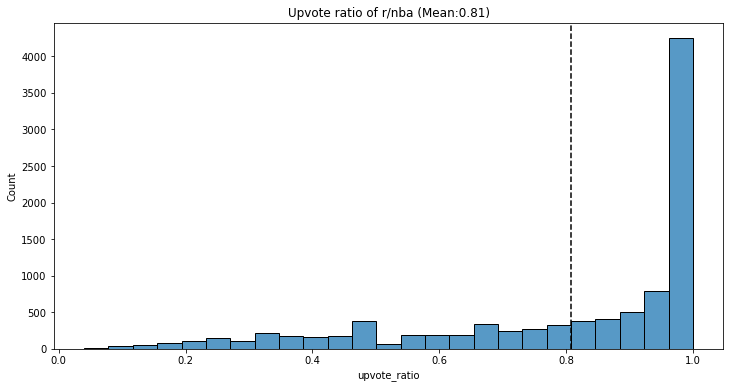

In [141]:
fig, ax = plt.subplots(figsize=(12,6))
mean_1 = pmaw_df['upvote_ratio'].mean()
g1 = sns.histplot(data=pmaw_df, x='upvote_ratio', bins = 25)
g1.set_title(f'Upvote ratio of r/nba (Mean:{(mean_1):.2f})')
g1.axvline(mean_1,
           color = 'black',
           ls='--');

The mean upvote ratio sits right at 0.81, which is fairly high. We can also see a high proportion of posts that have 1.0 upvote ratio. My hypothesis is that most posts just don't attract enough attention outside of the subreddit which would leave just people that are interested in the topic to vote on each submission. It could also be that most posts are buried under other submissions due to the high amount of submissions that occur every day.

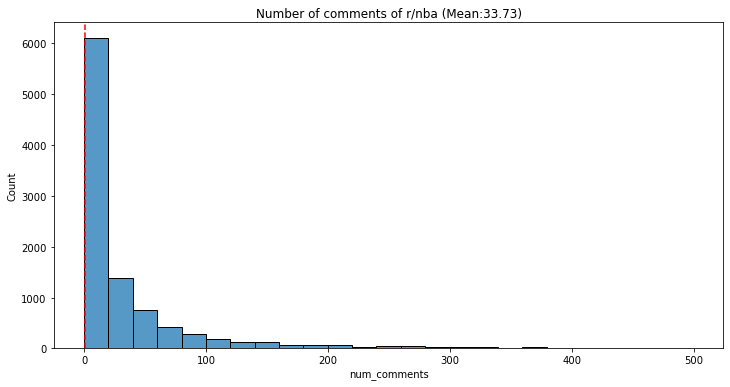

In [142]:
fig, ax = plt.subplots(figsize=(12,6))
mean_2 = pmaw_df['num_comments'].mean()
g2 = sns.histplot(data=pmaw_df, x='num_comments', bins = 25)
g2.set_title(f'Number of comments of r/nba (Mean:{(mean_2):.2f})')
g2.axvline(mean_1,
           color = 'red',
           ls='--');

This visual supports the above hypothesis that most submissions are buried under other submissions, as graph is heavily right skewed.

# Exploratory Data Analysis

## Title Length

In [143]:
def subplot_histograms(col, graph_title):
    fig, ax = plt.subplots(figsize=(12,6))
    
    # Plot first df   
    g1 = sns.histplot(data=pmaw_df, x=pmaw_df[col].str.len(), bins=25)
    mean = pmaw_df[col].str.len().mean()
    g1.axvline(mean, ls='--', color='red')
    g1.set_title(f'r/nba (Mean: {round(mean)} words)')
    g1.set_xlabel(f'Length of {col.capitalize()}')

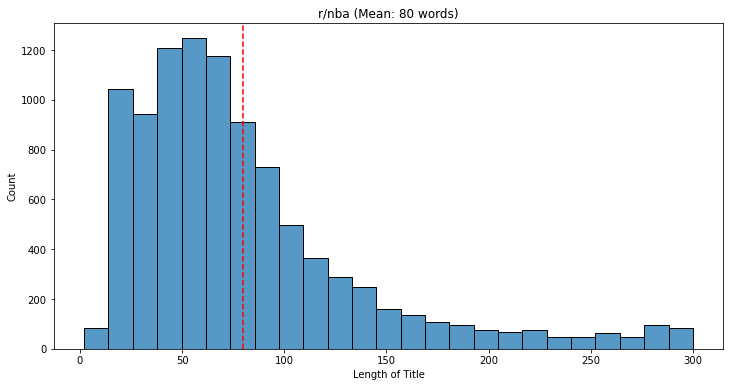

In [144]:
subplot_histograms('title', 'Average Title Length')

The average amount of words per title is 79. Some may think that this is quite large especially for title length, but as r/nba often uses quotes from athletes/analyzers/interviewers, it would not be that surprising to those that frequent the subreddit.

## Post Length

In [145]:
def subplot_histograms_1(col, graph_title):
    fig, ax = plt.subplots(figsize=(12,6))
    
    # Plot first df   
    g1 = sns.histplot(data=pmaw_df, x=pmaw_df[col].str.len(), bins=500)
    mean = pmaw_df[col].str.len().mean()
    plt.xlim(0,500)
    g1.axvline(mean, ls='--', color='red')
    g1.set_title(f'r/nba (Mean: {round(mean)} words)')
    g1.set_xlabel(f'Length of {col.capitalize()}')

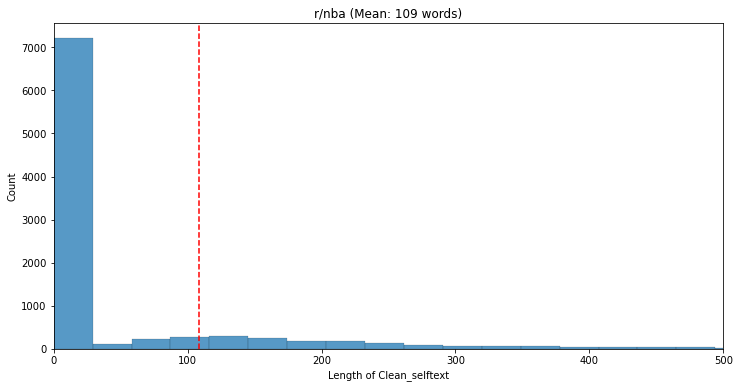

In [146]:
subplot_histograms_1('clean_selftext', 'Average Post Length')

From this graph, it is evident there is a large amount of submissions either have no post description, or very few words. This is probably due to the high amount of posts that only contain interview videos and/or pictures.

It is helpful to note that most of the more in-depth discussion surrounding the topic of NBA usually occurs in a different subreddit: `r/nbadiscussion`.

# Analyzing Ngrams

To analyze what kind of language is used in `r/nba`, I took a bag-of-words approach where each word is tokenized and counted according the the frequency of it within a post.

This approach is referred to as the bag-of-words because any informatiom regarding the order of the words are discarded. It only deals with whether the word is in the post or not and not where in the post. 

As we take this approach, we will try to remove frequent words that don't contain much information such as `a`, `of`, or `the` which are often referred to as 'stop-words'

In order to do this, we will use CountVectorizer which is a scikit-learn tool that helps tokenize the posts from the subreddit and build a vocabulary of known words and encode new texts using that same vocabulary.

In [147]:
# Create function to get top words
def plot_top_words(df, col, n, n_gram_range, title, palette='tab10'):
    def get_top_n_words(corpus, n=n, k=n_gram_range):     
        vec = CountVectorizer(ngram_range=(k,k), stop_words='english').fit(corpus)     
        bag_of_words = vec.transform(corpus)     
        sum_words = bag_of_words.sum(axis=0)      
        words_freq = [(word, sum_words[0, idx]) for word, idx in vec.vocabulary_.items()]    
        words_freq =sorted(words_freq, key = lambda x: x[1], reverse=True) 
        return words_freq[:n]
    temp_df = pd.DataFrame(data=get_top_n_words(df[col], n), columns=['word','freq'])
    plt.figure(figsize=(10,6))
    sns.barplot(data=temp_df, y='word', x='freq', palette=palette)
    plt.ylabel('')
    plt.xlabel('')
    plt.title(title, fontsize=18)

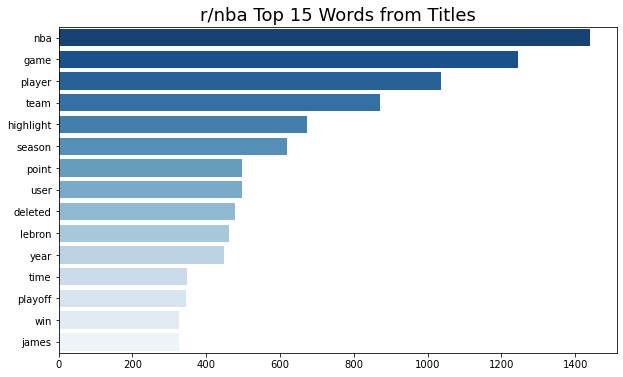

In [148]:
plot_top_words(pmaw_df,'clean_title', 15, 1, 'r/nba Top 15 Words from Titles', 'Blues_r')

In [149]:
stop_words = set(CountVectorizer(stop_words = 'english').get_stop_words())

There are a lot of general sports terms in the title itself, but we can see that there are specific terms such as `highlights`, which are specific to highlight clips from that day's games, and although separate by a little, the name `Lebron`  `James` is found within the top 15 words of the title, proving his popularity here as well.

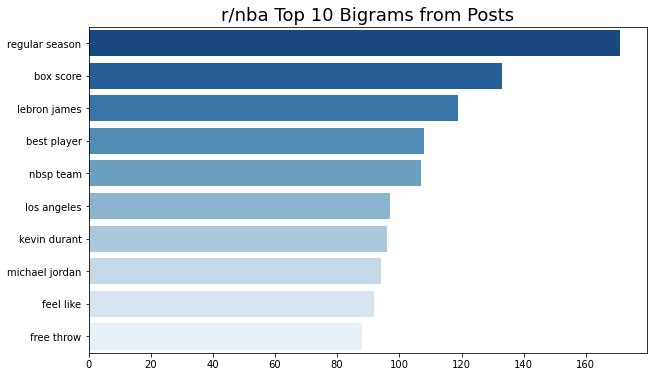

In [150]:
plot_top_words(pmaw_df,'clean_selftext', 10, 2, 'r/nba Top 10 Bigrams from Posts', 'Blues_r')

Looking at the bigrams gives us more of an indepth look at the descriptions, as we can tell more about the context that it is in. Here, we see phrases such as `regular season`, `box score`, `los angeles`, and `free throw` and we see names like `michael jordan`, `kevin durant`, and of course `lebron james`.

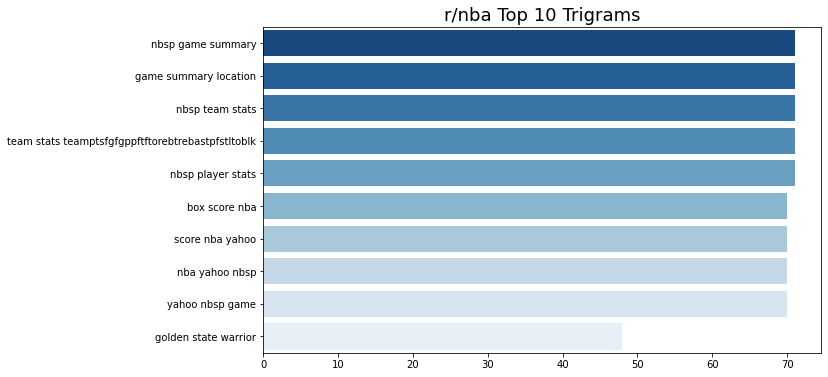

In [151]:
plot_top_words(pmaw_df,'clean_selftext', 10, 3, 'r/nba Top 10 Trigrams', 'Blues_r')

Looking at the trigrams of the selftexts doesn't give us much information, with the exception of `golden state warrior` being within the top ten for trigrams.

In [152]:
pmaw_df.to_csv('./datasets/final_df')